In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

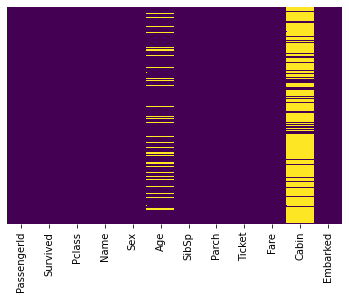

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


In [6]:
print('Percent of missing "Cabin" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 19.87%


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [12]:
def convert_cast(df,categorical_cols):
   for col_name in categorical_cols:
       df[col_name]=df[col_name].astype("object")
   return df
colonnes=["Survived","Pclass"]
train=convert_cast(train,colonnes)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 59.2+ KB


In [30]:
def input_missing_values(df):
    for col in df.columns:
        if (df[col].dtype is float) or (df[col].dtype is int):
            df[col]=df[col].fillna(df[col].median())
        if (df[col].dtype == object):
            df[col]=df[col].fillna(df[col].mode()[0].split(" ")[0])
    return df
train=input_missing_values(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96,S


In [33]:
survived=train[train.Survived==1]
print(len(survived))

dead=train[train.Survived==0]
print(len(dead))


342
549


In [85]:
def parse_model(X, use_columns):
    if "Survived" not in X.columns :
        raise ValueError("target column survived should belong to df")
    target=X["Survived"]
    X=X[use_columns]
    return X, target
model_cols1=['SibSp','Parch','Fare']
X,y=parse_model(X=train.copy(),use_columns=model_cols1)
print(X,y)

     SibSp  Parch     Fare
0        1      0   7.2500
1        1      0  71.2833
2        0      0   7.9250
3        1      0  53.1000
4        0      0   8.0500
..     ...    ...      ...
886      0      0  13.0000
887      0      0  30.0000
888      1      2  23.4500
889      0      0  30.0000
890      0      0   7.7500

[891 rows x 3 columns] 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [35]:
#ypredproba = Reg_Log.predict_proba(X_test)[:,1]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
def My_model (X,y,size,RdomState=42):
    #X,y
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=size,random_state=RdomState)
    model=LogisticRegression(random_state=RdomState)
    model.fit(X_train,y_train)
    #run the model
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)[:,1]
    score_train=model.score(X_train,y_train)
    score_test=model.score(X_test,y_test)
    
    return {"y_test":y_test,"prediction":y_pred,"proba":y_prob,"score_train":score_train,"score_test":score_test,"model":model}

model=My_model(X,y,0.3,42)["model"]
y_pred=My_model(X,y,0.3,42)["prediction"]
ttt=My_model(X,y,0.3,42)["y_test"]
My_model(X,y,0.3,42)

{'y_test': 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 821    1
 633    0
 456    0
 500    0
 430    1
 Name: Survived, Length: 268, dtype: int64,
 'prediction': array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        

In [38]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline


def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('Distribution relative de %s' %feature)
    plt.show()


Populating the interactive namespace from numpy and matplotlib


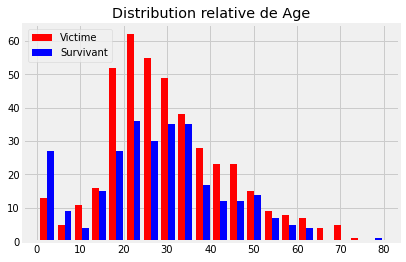

In [39]:
plot_hist('Age')

In [40]:
train["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [58]:
model_cols2=['SibSp','Parch','Fare','Pclass']
X,y=parse_model(X=train.copy(),use_columns=model_cols2)
X.head()

,SibSp,Parch,Fare,Pclass
0,1,0,7.2500,3
1,1,0,71.2833,1
2,0,0,7.9250,3
3,1,0,53.1000,1
4,0,0,8.0500,3


In [60]:
def dummify(X,cols) :
    for col in cols:
        X_dummies=pd.get_dummies(X[col],prefix=col,drop_first=False,dummy_na=False,prefix_sep='_')
        X=X.join(X_dummies).drop(col,axis=1)
    return X
cols=['Pclass']
X=dummify(X,cols)
X.head()
    
#X_dummies=pd.get_dummies(X["Pclass"],prefix="Pclass",drop_first=False,dummy_na=False,prefix_sep='_')
#X=X.join(X_dummies).drop("Pclass",axis=1)
#X.head()

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1


In [50]:
My_model(X,y,0.3,42)

{'y_test': 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 821    1
 633    0
 456    0
 500    0
 430    1
 Name: Survived, Length: 268, dtype: int64,
 'prediction': array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        

In [63]:
model_cols3=['SibSp','Parch','Fare',"Pclass","Sex","Age","Name"]
X,y=parse_model(X=train.copy(),use_columns=model_cols3)
X.head()

,SibSp,Parch,Fare,Pclass,Sex,Age,Name
0,1,0,7.2500,3,male,22.0,"Braund, Mr. Owen Harris"
1,1,0,71.2833,1,female,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,0,0,7.9250,3,female,26.0,"Heikkinen, Miss. Laina"
3,1,0,53.1000,1,female,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0,8.0500,3,male,35.0,"Allen, Mr. William Henry"


In [64]:
def convert_df_columns(data_str,features,type_var):
    for feature in features:
        data_str[feature]=data_str[feature].astype(type_var)
    return data_str

In [65]:
def transform_df(X, columns_to_dummify, features=["Pclass"],thres=10):
    X=convert_df_columns(X,features,type_var="object")
    X["is_child"]=X["Age"].apply(lambda x: 0 if x<thres else 1)
    X["title"]=X["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
    X["Surname"]=X['Name'].map(lambda x: '(' in x)
    for col in columns_to_dummify:
        X_dummies=pd.get_dummies(X[col],prefix=col,drop_first=False,dummy_na=False, prefix_sep='_')
        X=X.join(X_dummies).drop(col,axis=1)
    return X.drop("Name",axis=1).drop("Age",axis=1)
columns_to_dummify=["Pclass","Sex","title","Surname"]
X=transform_df(X,columns_to_dummify)
X.head()

,SibSp,Parch,Fare,is_child,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,title_Capt,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,Surname_False,Surname_True
0,1,0,7.2500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,71.2833,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,7.9250,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,53.1000,1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,8.0500,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [71]:
My_model(X,y,0.3,42)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'y_test': 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 821    1
 633    0
 456    0
 500    0
 430    1
 Name: Survived, Length: 268, dtype: int64,
 'prediction': array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        

In [ ]:
#RANDOM FOREST

In [113]:
model_cols1=['SibSp','Parch','Fare']
X,y=parse_model(X=train.copy(),use_columns=model_cols1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [114]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42,n_estimators=100,criterion="gini",max_depth=20)

model.fit(X_train,y_train)


score1=model.score(X_train,y_train)
print(score1)
score2=model.score(X_test,y_test)
print(score2)

0.841091492776886
0.6529850746268657


In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf=KFold(n_splits=5,shuffle=True)

scores=cross_val_score(model,X,y,cv=kf,n_jobs=1)

print(scores)

print('average score:%.2f'%np.mean(scores))

[0.68156425 0.70224719 0.66853933 0.69101124 0.66292135]
average score:0.68


In [131]:
from sklearn.model_selection import GridSearchCV

Estimator = RandomForestClassifier(random_state=42)
parameters={
    'n_estimators':[100,150,200,250,300],
    'max_depth': np.arange(6,16,2),
    'min_samples_split': np.arange(10,30,5),
    'min_samples_leaf' : np.arange(5,20,5)
}
model2=GridSearchCV(Estimator,parameters,verbose=1,cv=5,n_jobs=-1)
model2.fit(X_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 34.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 6,  8, 10, 12, 14]),
                         'min_samples_leaf': array([ 5, 10, 15]),
                         'min_samples_split': array([10, 15, 20, 25]),
                         'n_estimators': [100, 150, 200, 250, 300]},
             verbose=1)

In [81]:
model2.best_estimator_.estimators_[0].max_depth

8

In [87]:
y_pred=model2.predict(X_test)
score=model2.score(X_test,y_test)
print("Les paramètres du meilleur modèle sont:")
score

ValueError: Number of features of the model must match the input. Model n_features is 28 and input n_features is 3 

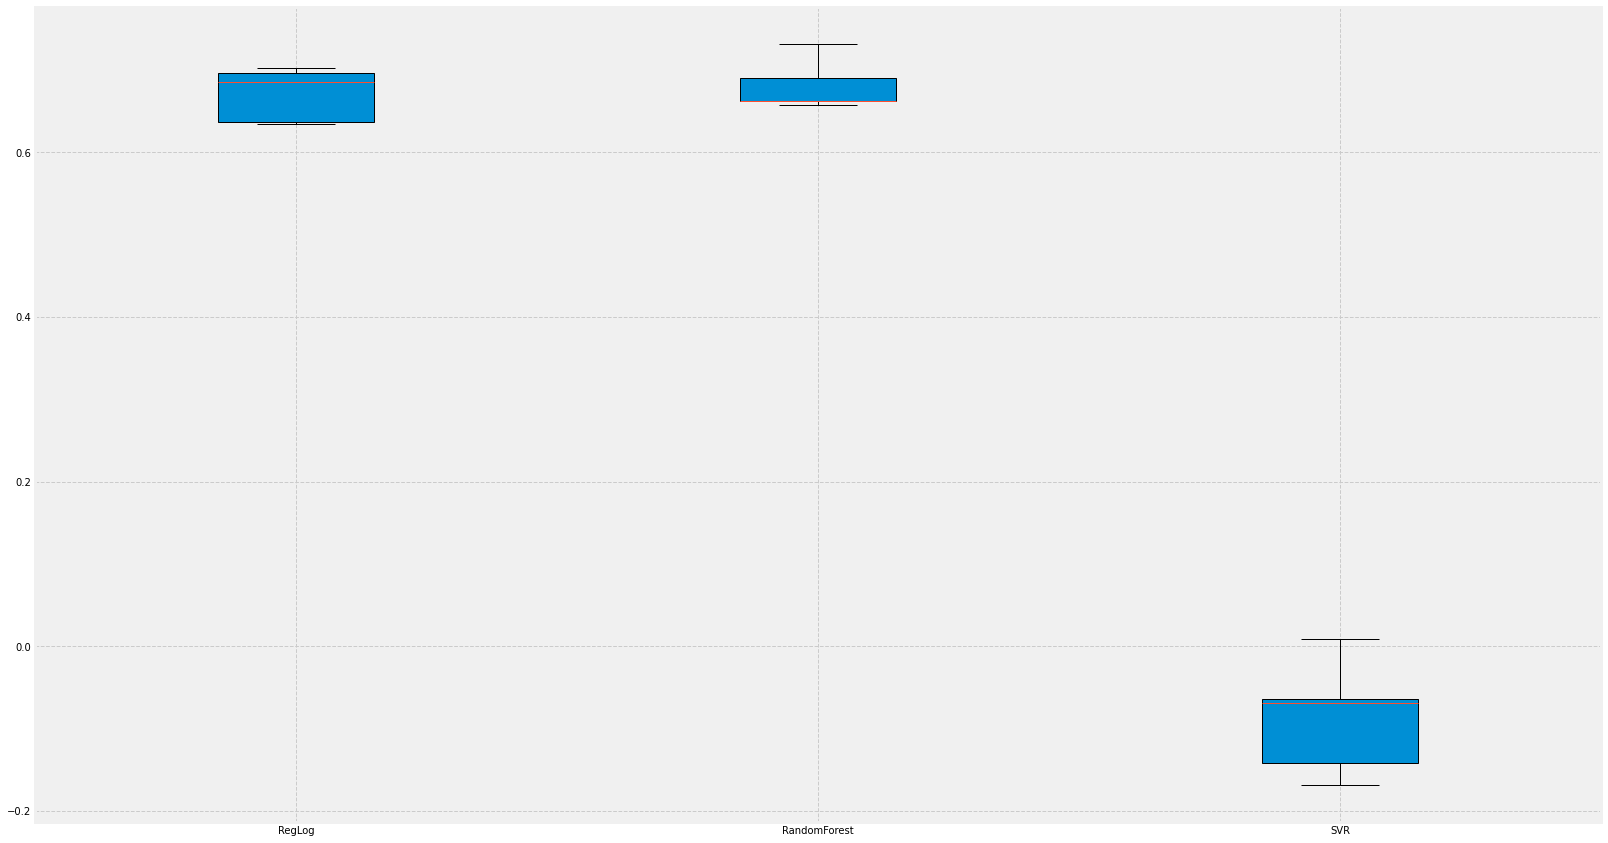

In [130]:
from sklearn.svm import SVR
kf = KFold(n_splits=5)

model_cols1=['SibSp','Parch','Fare']
X,y=parse_model(X=train.copy(),use_columns=model_cols1)

model1 = []
model2 = []
model3 = []

model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)
kf=KFold(n_splits=5,shuffle=True)
model1=cross_val_score(model,X,y,cv=kf,n_jobs=1)

    
model=RandomForestClassifier(random_state=42,n_estimators=100,criterion="gini",max_depth=20)
model.fit(X_train,y_train)
kf=KFold(n_splits=5,shuffle=True)
model2=cross_val_score(model,X,y,cv=kf,n_jobs=1)

model=SVR()
model.fit(X_train,y_train)
kf=KFold(n_splits=5,shuffle=True)
model3=cross_val_score(model,X,y,cv=kf,n_jobs=1)


tmp = [model1, model2, model3]
labels = ["RegLog", "RandomForest","SVR"]
figure = plt.figure(figsize=(25,15))
boxlook = plt.boxplot(tmp,labels=labels,patch_artist=True)
plt.grid(linestyle='--')